In [76]:
import numpy as np
import pandas as pd

## Load train and test data

In [81]:
train = pd.read_csv("train_2kmZucJ.csv")
test = pd.read_csv("test_oJQbWVk.csv")

In [82]:
train

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...


In [83]:
test

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...
...,...,...
1948,9869,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old..."
1949,9870,Now Available - Hoodie. Check it out here - ht...
1950,9871,There goes a crack right across the screen. If...
1951,9872,@codeofinterest as i said #Adobe big time we m...


In [84]:
#we dont need the id
train.drop(columns = ['id'],axis = 1, inplace = True)

## Data Preprocessing

In [85]:
#we will divide the train set in X and y
X = train['tweet'].values
y = train['label'].values
test_tweet = test['tweet'].values

In [86]:
# we will  create a function to remove the special characters or noise from the tweets
import re
def preprocess_text(text):
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL', text)
    text = re.sub('@[^\s]+','USER', text)
    text = text.lower().replace("ё", "е")
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +',' ', text)
    return text.strip()


In [87]:
X = [preprocess_text(t) for t in X]
test_tweet = [preprocess_text(t) for t in test_tweet]

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

In [89]:
#create a countVectorizer which will create the frequency of words 
vec =  CountVectorizer(stop_words= 'english')

In [90]:
vec.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [91]:
len(vec.vocabulary_)

16967

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
#speit the train data into train and test(validation)
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 1)

In [94]:
# transform the train and test tweets 
X_train_trans = vec.transform(X_train)
X_test_trans = vec.transform(X_test)

test_trans = vec.transform(test_tweet)

## Building Model

In [95]:
from sklearn.naive_bayes import MultinomialNB

In [96]:
# create an object of multinomial naive bayes
mnb = MultinomialNB()

In [97]:
#fitting
mnb.fit(X_train_trans,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [98]:
y_test_pred = mnb.predict(X_test_trans)

In [99]:
y_test_pred_prob = mnb.predict_proba(X_test_trans)

In [100]:
from sklearn import metrics

## Evaluation of the model on validation data

In [101]:
accuracy = metrics.accuracy_score(y_test,y_test_pred)
accuracy

0.8783670033670034

In [102]:
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test,y_test_pred)
cm

Confusion Matrix


array([[1555,  186],
       [ 103,  532]], dtype=int64)

In [103]:
print("ACCURACY",accuracy)
print("PRECISION SCORE :",metrics.precision_score(y_test,y_test_pred))
print("RECALL SCORE :", metrics.recall_score(y_test,y_test_pred))
print("F1 SCORE :",metrics.f1_score(y_test,y_test_pred))

ACCURACY 0.8783670033670034
PRECISION SCORE : 0.7409470752089137
RECALL SCORE : 0.8377952755905512
F1 SCORE : 0.7864005912786401


In [108]:
# creating an ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_pred_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [109]:
# area under the curve
print (roc_auc)

0.9399191341748565


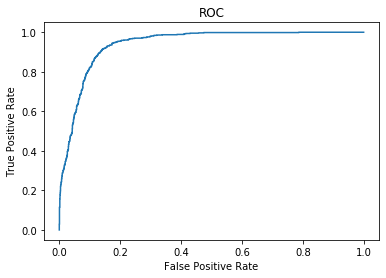

In [110]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

**We got an accuracy of 87 and F1 score 78%**

## Prediction on test data

In [104]:
test['label'] = mnb.predict(test_trans)

In [105]:
test.head()

,id,tweet,label
0,7921,I hate the new #iphone upgrade. Won't let me d...,1
1,7922,currently shitting my fucking pants. #apple #i...,1
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t...",1
3,7924,My ipod is officially dead. I lost all my pict...,1
4,7925,Been fighting iTunes all night! I only want th...,1


In [106]:
final = test[['id','label']]

In [107]:
final.to_csv("solution.csv",index = False)